In [69]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
f = open('../experiment_data/mturk-experiment-2.json')
  
data = json.load(f)
  
f.close()

In [14]:
agents = ['bc_simple_1', 'nct_simple_1', 'action_cml_simple_1', 'sac_self_play_simple_0_1']
feedback_subtasks = [5, 7, 9, 11]
game_subtasks = [4, 6, 8, 10]
workers = range(len(data))

In [15]:
all_data = pd.DataFrame()
df = pd.DataFrame()


responses = []
for worker in workers:
    for agent in agents:
        for game_subtask in game_subtasks: #find the right subtask for the agent order
            if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
                game_info = data[worker]['results']['data'][game_subtask+1]
                game_info['agent'] = agent
                game_info['workerId'] = data[worker]['workerId']
                responses.append(data[worker]['results']['data'][game_subtask+1])

df = pd.DataFrame.from_dict(responses)


In [16]:
df

,helpful,competent,enjoy,humanlike,efficient,flexible,predictable,partnerFeedback,agent,workerId
0,6,5,6,7,7,6,6,GOOD,bc_simple_1,A14YPOV9J2FAYU
1,5,6,7,6,5,5,6,OK,nct_simple_1,A14YPOV9J2FAYU
2,7,7,6,5,6,6,5,OK,action_cml_simple_1,A14YPOV9J2FAYU
3,6,7,6,6,5,6,6,GOOD,sac_self_play_simple_0_1,A14YPOV9J2FAYU
4,3,3,3,3,3,2,2,This partner seemed a bit confusing and our so...,bc_simple_1,A10HW8JXM17XLD
5,5,5,5,3,5,6,3,I noticed that this partner seemed better at t...,nct_simple_1,A10HW8JXM17XLD
6,4,6,3,3,7,4,5,My partner was so fast that I was hardly able ...,action_cml_simple_1,A10HW8JXM17XLD
7,3,5,4,3,6,3,3,This partner was a little slower and also seem...,sac_self_play_simple_0_1,A10HW8JXM17XLD
8,3,3,3,4,3,2,3,no,bc_simple_1,A1969Q0R4Y0E3J
9,7,7,7,5,7,7,7,no,nct_simple_1,A1969Q0R4Y0E3J


In [37]:
def get_subtask(agent, worker, game_subtasks):

    for game_subtask in game_subtasks: #find the right subtask for the agent order
        if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
            return game_subtask
    return -1

In [42]:
def get_reward(worker, game_subtask):
    total_reward = 0

    for timestep in data[worker]['results']['data'][game_subtask]['data']['trajectory']:
        total_reward += timestep['reward']

    return total_reward

In [59]:
score_data = pd.DataFrame()

all_scores = []
for worker in workers:
    scores_dict = {}
    for agent in agents:
        game_subtask = get_subtask(agent, worker, game_subtasks)
        reward = get_reward(worker, game_subtask)
        scores_dict[agent] = reward
    all_scores.append(scores_dict)




In [60]:
scores_df = pd.DataFrame(all_scores)

In [61]:
scores_df

,bc_simple_1,nct_simple_1,action_cml_simple_1,sac_self_play_simple_0_1
0,1,4,5,4
1,2,5,5,5
2,5,10,7,6
3,4,6,6,5
4,1,5,1,4
5,1,8,3,6
6,4,5,5,6
7,10,9,8,10
8,2,5,5,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab37a124d0>,
      dtype=object)

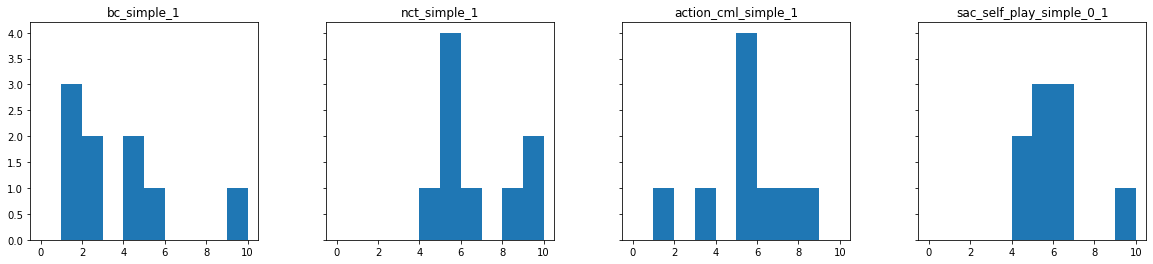

In [77]:
scores_df.hist(layout=(1,4), figsize=(20,4), sharey=True, sharex=True, grid=False, bins=range(11))

In [80]:
scores_df.mean()

bc_simple_1                 3.333333
nct_simple_1                6.333333
action_cml_simple_1         5.000000
sac_self_play_simple_0_1    5.666667
dtype: float64